 # Graduate Rotational Internship Program by The Sparks Foundation
 

### Author: Fahad Munir

## Task 3
## Exploratoy Data Analysis-Retail

This task is part of the internship with The Sparks Foundation. In this task we have to analyze the SampleSuperstore dataset in order to find out some valuable insights

In [2]:
# Importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing Dataset
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#States names
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

#Region names
data.Region.unique()

In [11]:
#Shipping mode
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

There are four shipping mode:
1. Second Class
2. Standard Class
3. First Class 
4. Same Day

In [12]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Three categories of goods:
- Furniture
- Office Supplies
- Technology

In [13]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

##### Products that are selling in this site:
- Bookcases
- Chairs
- Labels
- Tables
- Storage
- Furnishings
- Art
- Phones
- Binders
- Appliances
- Machines
- Copiers

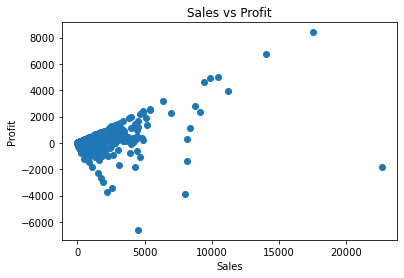

In [21]:
#Sales vs Profit plot

plt.scatter(data.Sales, data.Profit)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

Let's make a profit vs loss graph. In order to do that we need to make a new column in the dataset.


In [88]:
PL = pd.Series([],dtype=pd.StringDtype())
for i in range(len(data)):
    if data['Profit'][i] > 0:
        PL[i] = 'Profit'
    else:
        PL[i] = 'Loss'

        
# data.insert(loc = 11, column = 'PL', value = PL)


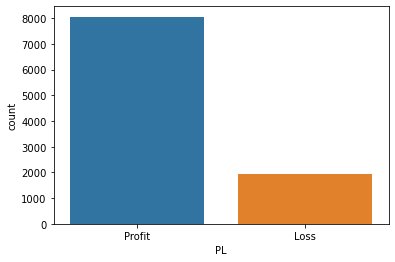

In [62]:
sns.countplot('PL', data=data)

### Profit-Loss barplot for Category

Which category of product is giving us more profit and which category giving us more loss?


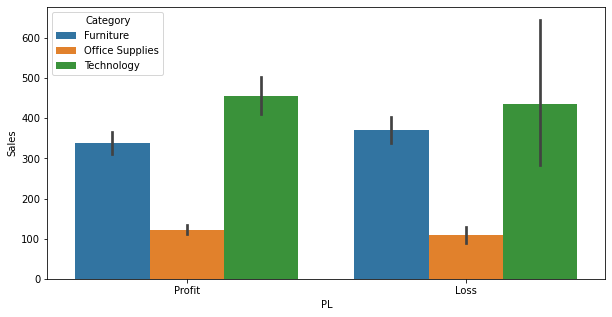

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x='PL', y = 'Sales', data = data, hue='Category')

##### We can infer from the above plot, technology products can give us huge profit as well as huge losses at times. ON the other hand hand in the office supplies, the profit is lower but the loss is also very low that means the risk of doing business is less. Furniture products have a bit higher loss number than profit.

### Profit-Loss barplot from sub-category

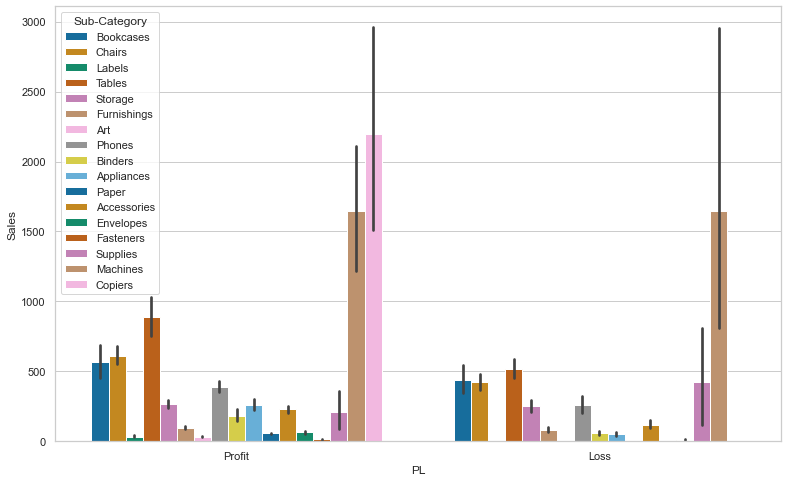

In [69]:
plt.figure(figsize=(13,8))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("colorblind", len(data))
sns.barplot(x='PL', y = 'Sales', data = data, palette = pal, hue='Sub-Category')

### Discount effect on Profit and Sales of Product

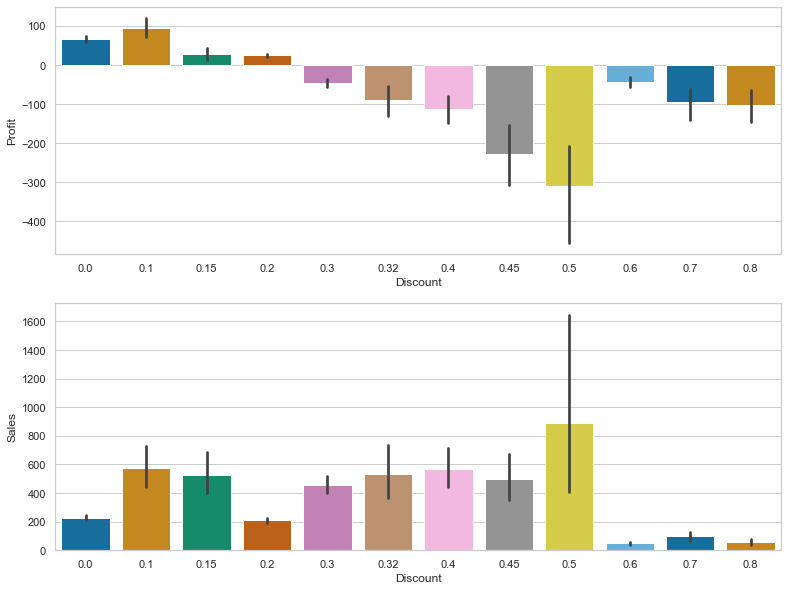

In [71]:
plt.figure(figsize=(13,10))

pal = sns.color_palette("colorblind", len(data))
plt.subplot(2,1,1)
sns.barplot(x='Discount', y='Profit', palette = pal, data=data)

plt.subplot(2,1,2)
sns.barplot(x='Discount', y='Sales', palette = pal, data=data)

We can see the profit is lower when high discount is placed on the other hand discount increases Sales.

### Profits by Region and States

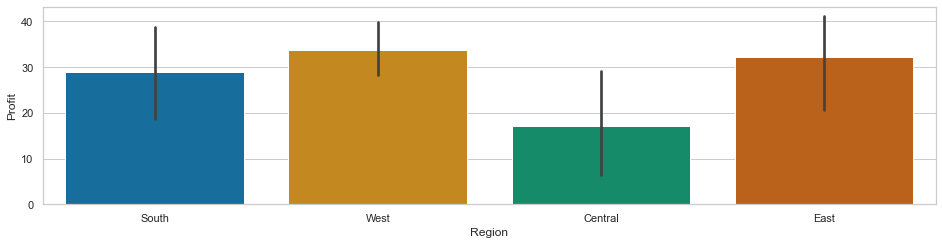

In [72]:
#Profits by Region and States
plt.figure(figsize=(16,8))

pal = sns.color_palette("colorblind", len(data))
plt.subplot(2,1,1)
sns.barplot(x='Region', y='Profit', palette = pal, data=data)



We can see, the shops of west region makes the highest profit and the shops of east comes after that. The company needs to focus on the profit of Central region shops as its number is very low.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

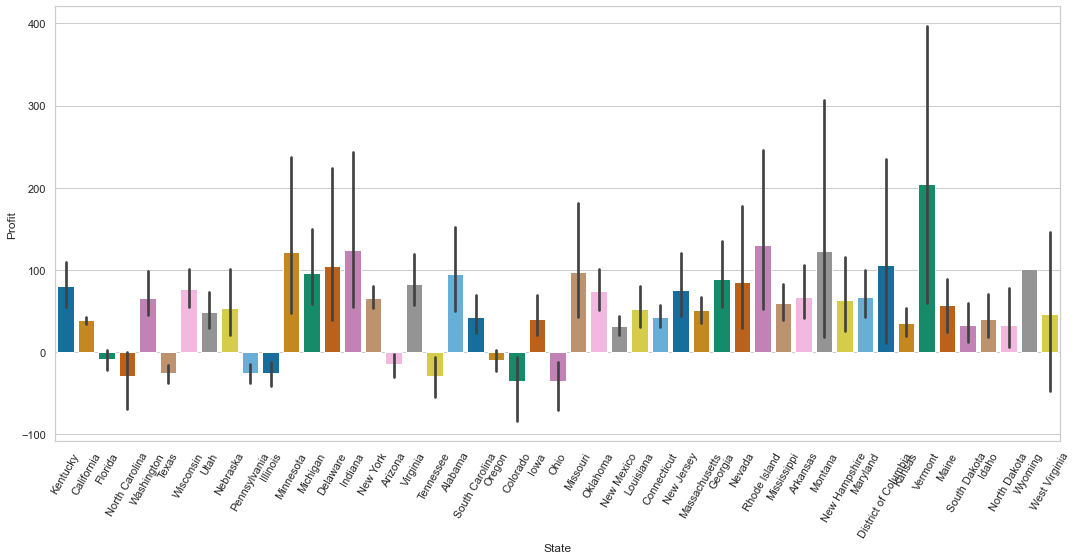

In [81]:
plt.figure(figsize=(18,8))

pal = sns.color_palette("colorblind", len(data))

sns.barplot(x='State', y='Profit', palette = pal, data=data)
plt.xticks(rotation=60)

We can see around 10 states arein losses and others are gaining profits.

## Most used shipping mode

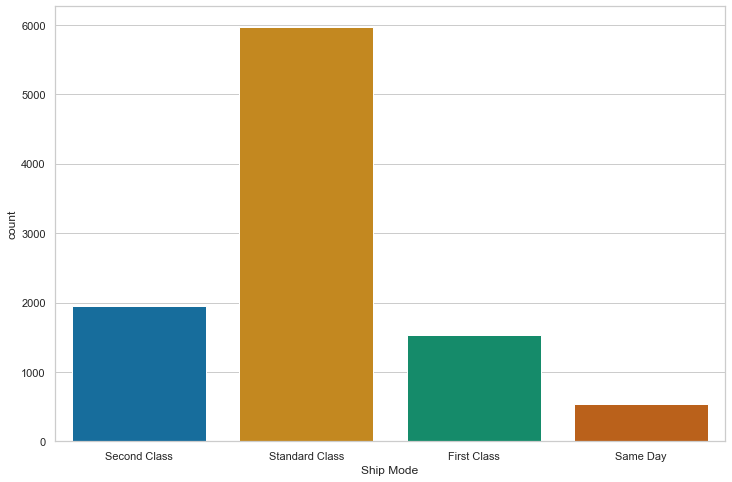

In [84]:
plt.figure(figsize=(12,8))

pal = sns.color_palette("colorblind", len(data))

sns.countplot('Ship Mode', palette = pal, data=data)

Standard class is the most popular shipping mode.

### Most popular segment

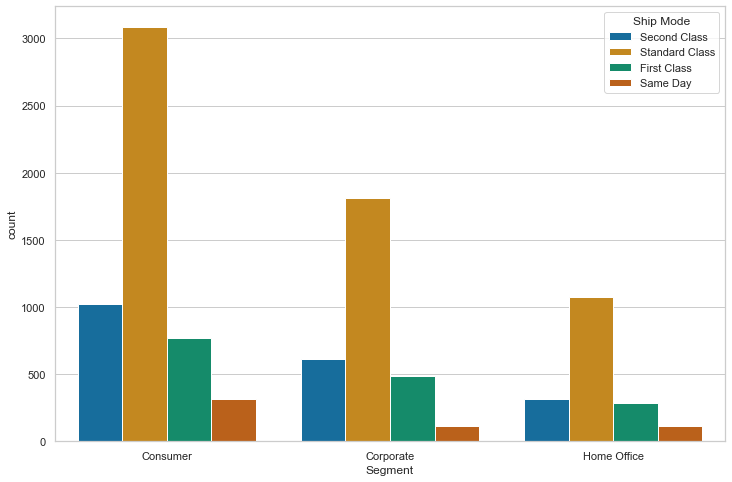

In [86]:
plt.figure(figsize=(12,8))

pal = sns.color_palette("colorblind", len(data))

sns.countplot('Segment', palette = pal, data=data, hue = 'Ship Mode')

##### We can infer from the above graph, standard class is popular for all the segment as second class is also quite used one.

In [55]:
Profit_Ratio = pd.Series([],dtype=pd.StringDtype())
for i in range(len(data)):
    Profit_Ratio[i] = np.sum(data['Profit']) / np.sum(data['Sales'])

In [56]:
Profitability_KPI = pd.Series([],dtype=pd.StringDtype())
for i in range(len(data)):
    if data['Profit_Ratio'][i] < 0.33: 
        Profitability_KPI[i] = "OK" 
    elif data['Profit_Ratio'][i] < 0.1: 
        Profitability_KPI[i] = "Bad" 
    else: 
        Profitability_KPI[i] = "Good"

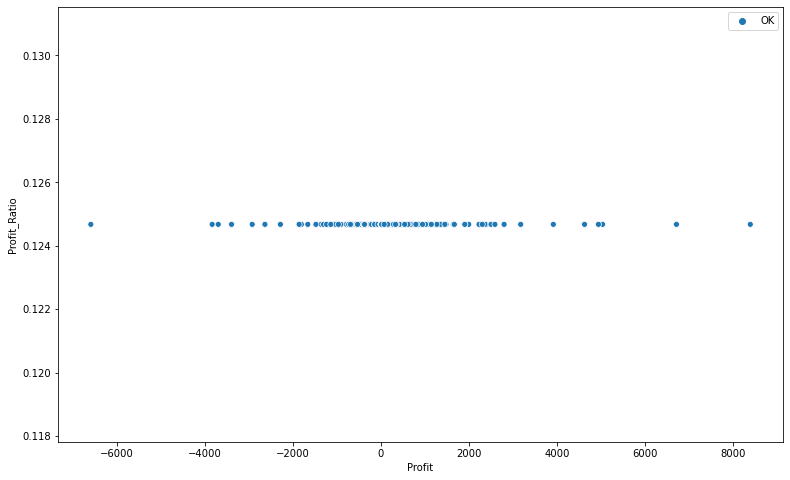

In [57]:
plt.figure(figsize=(13,8))
sns.scatterplot(x='Profit',y='Profit_Ratio',data=data,hue=Profitability_KPI)